<a href="https://colab.research.google.com/github/ShiyangLai/Political-Speech-Deep-Learning-Final-Project/blob/Sudhamshu/notebook/final_project_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import math
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

In [3]:
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,BatchNormalization
from keras.preprocessing import image

In [5]:
model = Sequential()

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
    
model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
model.inputs

[<KerasTensor: shape=(None, 48, 48, 1) dtype=float32 (created by layer 'conv2d_input')>]

In [8]:
model.load_weights('/content/drive/MyDrive/MACS-37000/week2/weights.h5')

In [9]:
!unzip '/content/drive/MyDrive/MACS-37000/week2/FER.zip' -d '/tmp/'

Streaming output truncated to the last 5000 lines.
  inflating: /tmp/FER/train/angry/Training_81541574.jpg  
  inflating: /tmp/__MACOSX/FER/train/angry/._Training_81541574.jpg  
  inflating: /tmp/FER/train/angry/Training_50120123.jpg  
  inflating: /tmp/__MACOSX/FER/train/angry/._Training_50120123.jpg  
  inflating: /tmp/FER/train/angry/Training_60016886.jpg  
  inflating: /tmp/__MACOSX/FER/train/angry/._Training_60016886.jpg  
  inflating: /tmp/FER/train/angry/Training_68690730.jpg  
  inflating: /tmp/__MACOSX/FER/train/angry/._Training_68690730.jpg  
  inflating: /tmp/FER/train/angry/Training_73515932.jpg  
  inflating: /tmp/__MACOSX/FER/train/angry/._Training_73515932.jpg  
  inflating: /tmp/FER/train/angry/Training_32153813.jpg  
  inflating: /tmp/__MACOSX/FER/train/angry/._Training_32153813.jpg  
  inflating: /tmp/FER/train/angry/Training_57743136.jpg  
  inflating: /tmp/__MACOSX/FER/train/angry/._Training_57743136.jpg  
  inflating: /tmp/FER/train/angry/Training_15933141.jpg  
  

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('/tmp/FER/test',
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [11]:
test_set

In [12]:
test_loss, test_acc = model.evaluate(test_set)

113/113 [==============================] - 12s 15ms/step - loss: 1.4503 - accuracy: 0.6480


In [13]:
test_loss, test_acc

(1.4503484964370728, 0.6479520797729492)

In [14]:
extractor = keras.Model(inputs=model.inputs,
                        outputs=[model.layers[-2].output])

In [15]:
X_list = []
y_list = []

In [16]:
for _ in range(15):
  X, Y = test_set.next()
  for x in X:
    X_list.append(extractor(x.reshape(1, 48, 48, 1))[0])
  for y in Y:
    y_list.append(np.argmax(y))

In [17]:
X[0][:,:,0].shape

(48, 48)

In [19]:
import matplotlib.pyplot as plt

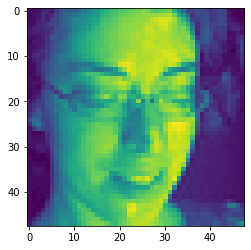

In [20]:
plt.imshow(X[0][:,:,0])

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [22]:
x = np.array(X_list)

In [23]:
x[0].shape

(512,)

In [24]:
pca = PCA(n_components=50)

In [25]:
X_r = pca.fit_transform(np.array(X_list))

In [26]:
test_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


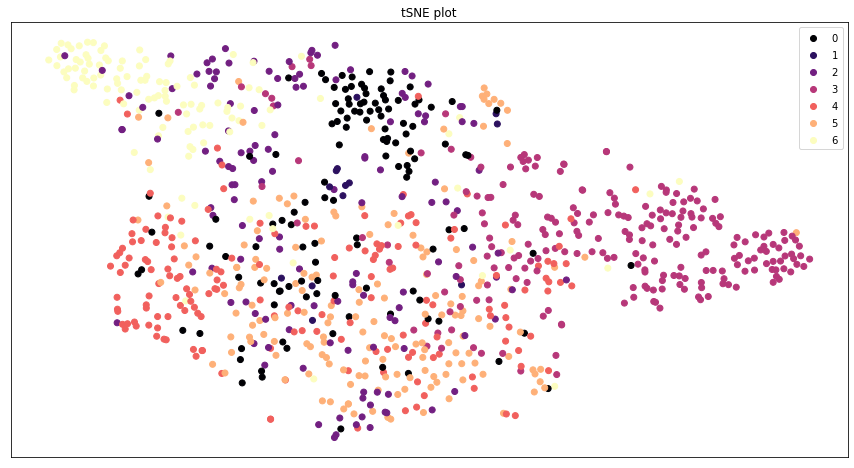

In [27]:
plt.figure(figsize=(15, 8))
plt.clf()
tsne = TSNE()
X_embedded = tsne.fit_transform(X_r)
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_list, label=test_set.class_indices.keys(), cmap=plt.cm.magma)
plt.title("tSNE plot")
plt.xticks(())
plt.yticks(())
plt.legend(*scatter.legend_elements(), loc='best')

plt.show()

In [ ]:
!unzip '/content/drive/MyDrive/MACS-37000/final/faces_only.zip' -d '/tmp/'

In [208]:
test_datagen1 = ImageDataGenerator(rescale=1./255)
dataset = test_datagen1.flow_from_directory('/tmp/faces_only',
                                                batch_size=1,
                                                target_size=(48,48),
                                                shuffle=False,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 367 images belonging to 19 classes.


In [30]:
X_list_pres = []
y_list_pres = []

In [31]:
for i in dataset:
  files = dataset.filenames
  print(len(dataset.filenames))
  break

367


In [32]:
dataset.class_indices

{'Campaign': 0,
 'Commemoration': 1,
 'Congress': 2,
 'Convention': 3,
 'Debate': 4,
 'FP': 5,
 'Farewell': 6,
 'Inaugural': 7,
 'Misc': 8,
 'Money': 9,
 'Policy': 10,
 'Press': 11,
 'Protest': 12,
 'SOTU': 13,
 'Scandal': 14,
 'Tragedy': 15,
 'UN': 16,
 'University': 17,
 'War': 18}

In [33]:
ind_map = {v: k for k, v in dataset.class_indices.items()}

In [34]:
ind_map

{0: 'Campaign',
 1: 'Commemoration',
 2: 'Congress',
 3: 'Convention',
 4: 'Debate',
 5: 'FP',
 6: 'Farewell',
 7: 'Inaugural',
 8: 'Misc',
 9: 'Money',
 10: 'Policy',
 11: 'Press',
 12: 'Protest',
 13: 'SOTU',
 14: 'Scandal',
 15: 'Tragedy',
 16: 'UN',
 17: 'University',
 18: 'War'}

In [35]:
X, Y = dataset.next()

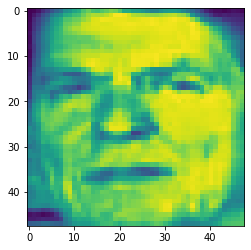

In [63]:
plt.imshow((X.reshape(1, 48, 48, 1))[0][:,:,0])

In [73]:
(X.reshape(1, 48, 48, 1))[0][:,:,0].shape

(48, 48)

In [68]:
np.array(extractor(X.reshape(1, 48, 48, 1))[0]).shape

(512,)

In [37]:
Y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [38]:
np.argmax(Y[0])

0

In [39]:
DF = pd.read_csv('/content/drive/MyDrive/MACS-37000/final/presidential_speeches_manual_labels.csv')

In [40]:
DF = DF.fillna('Misc')

In [136]:
DF['img'][0] = np.zeros(shape=(48,48))

In [141]:
DF.loc[DF.Date==date,'img']

651    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: img, dtype: object

In [ ]:
[np.array([], dtype=np.float64) for _ in range(992)]

In [120]:
np.array([np.zeros(shape=(48,48)) for _ in range(992)]).shape

(992, 48, 48)

In [124]:
np.zeros(shape=(48,48))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
[[] for _ in range(992)]

In [165]:
DF['img'] = [[] for _ in range(992)]
DF['embedding'] = [[] for _ in range(992)]

In [167]:
DF

,Date,President,Party,Context,Speech Title,Summary,Transcript,URL,img,embedding
0,1789-04-30,George Washington,Unaffiliated,Inaugural,First Inaugural Address,Washington calls on Congress to avoid local an...,Fellow Citizens of the Senate and the House of...,https://millercenter.org/the-presidency/presid...,[],[]
1,1789-10-03,George Washington,Unaffiliated,Misc,Thanksgiving Proclamation,"At the request of Congress, Washington establi...",Whereas it is the duty of all Nations to ackno...,https://millercenter.org/the-presidency/presid...,[],[]
2,1790-01-08,George Washington,Unaffiliated,Congress,First Annual Message to Congress,"In a wide ranging speech, President Washington...",Fellow Citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...,[],[]
3,1790-12-08,George Washington,Unaffiliated,Congress,Second Annual Message to Congress,Washington focuses on commerce in his second a...,Fellow citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...,[],[]
4,1790-12-29,George Washington,Unaffiliated,Native,Talk to the Chiefs and Counselors of the Senec...,The President reassures the Seneca Nation that...,"I the President of the United States, by my ow...",https://millercenter.org/the-presidency/presid...,[],[]
...,...,...,...,...,...,...,...,...,...,...
987,2019-01-19,Donald Trump,Republican,Policy,Remarks about the US Southern Border,President Donald Trump speaks about what he se...,"Just a short time ago, I had the honor of pres...",https://millercenter.org/the-presidency/presid...,[],[]
988,2019-02-05,Donald Trump,Republican,SOTU,State of the Union Address,"In his second State of the Union Address, Pres...","Madam Speaker, Mr. Vice President, Members of ...",https://millercenter.org/the-presidency/presid...,[],[]
989,2019-02-15,Donald Trump,Republican,Policy,Speech Declaring a National Emergency,President Donald Trump declares a national eme...,"Thank you very much, everybody. Before we begi...",https://millercenter.org/the-presidency/presid...,[],[]
990,2019-09-24,Donald Trump,Republican,UN,Remarks at the United Nations General Assembly,President Donald Trump speaks to the 74th sess...,"Thank you very much. Mr. President, Mr. Secret...",https://millercenter.org/the-presidency/presid...,[],[]


In [130]:
DF.img[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
files[0].split('/')[1].split('_')[0]

'1964-10-09'

In [43]:
DF.columns

Index(['Date', 'President', 'Party', 'Context', 'Speech Title', 'Summary',
       'Transcript', 'URL', 'img', 'embedding'],
      dtype='object')

In [207]:
DF.Date.value_counts()[:25]

1920-07-22    5
1948-09-18    2
1865-05-29    2
1965-03-26    2
1890-12-01    2
1916-09-02    2
1891-12-09    2
1825-12-06    2
1911-01-26    2
1892-12-06    2
1893-08-08    2
1903-12-07    2
1929-07-24    2
1974-08-09    2
1889-12-03    2
1895-06-12    2
1837-03-04    2
1850-12-13    2
1976-08-19    2
1965-08-06    1
1966-03-23    1
1966-07-20    1
1965-04-27    1
1965-04-28    1
1965-05-02    1
Name: Date, dtype: int64

In [175]:
DF[DF.Date=='2001-08-09']

,Date,President,Party,Context,Speech Title,Summary,Transcript,URL,img,embedding
888,2001-08-09,George W. Bush,Republican,Misc,Address to the Nation on Stem Cell Research,President Bush addresses the nation on his pos...,Good evening. I appreciate you giving me a few...,https://millercenter.org/the-presidency/presid...,"[[0.8549020290374756, 0.8117647767066956, 0.79...",[]


In [69]:
x_list_pres = []
y_list_pres = []

In [70]:
from tqdm import tqdm

In [61]:
X, Y = dataset.next()

In [75]:
DF.loc[DF.Date==date, 'img'].shape

(1,)

In [76]:
pd.Series([[48,48]]*len((DF.Date==date)), index=(DF.Date==date))

Date
False    [48, 48]
False    [48, 48]
False    [48, 48]
False    [48, 48]
False    [48, 48]
           ...   
False    [48, 48]
False    [48, 48]
False    [48, 48]
False    [48, 48]
False    [48, 48]
Length: 992, dtype: object

In [225]:
test_datagen1 = ImageDataGenerator(rescale=1./255)
dataset = test_datagen1.flow_from_directory('/tmp/faces_only',
                                                batch_size=1,
                                                target_size=(48,48),
                                                shuffle=False,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 367 images belonging to 19 classes.


In [226]:
for f in tqdm(files):
  date = f.split('/')[1].split('_')[0]
  X, Y = dataset.next()
  DF.loc[DF.Date==date, 'img'] = [(X.reshape(1, 48, 48, 1))[0][:,:,0].tolist()]
  DF.loc[DF.Date==date, 'embedding'] = [extractor(X.reshape(1, 48, 48, 1))[0].numpy().tolist()]
  x_list_pres.append(np.array(extractor(X.reshape(1, 48, 48, 1))[0]))
  y_list_pres.append(np.argmax(Y[0]))

100%|██████████| 367/367 [00:06<00:00, 57.15it/s]


In [ ]:
extractor(X.reshape(1, 48, 48, 1))[0].numpy().tolist()

In [ ]:
(X.reshape(1, 48, 48, 1))[0][:,:,0]

In [ ]:
(X.reshape(1, 48, 48, 1))[0][:,:,0].tolist()

In [172]:
len([(X.reshape(1, 48, 48, 1))[0][:,:,0].tolist()])

1

In [169]:
len(list((X.reshape(1, 48, 48, 1))[0][:,:,0].tolist()))

48

In [122]:
DF.loc[DF.Date==date, 'img'].shape

(1,)

In [232]:
np.array(DF.at[989,'embedding']).shape

(512,)

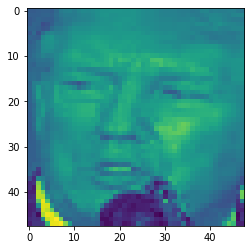

In [227]:
plt.imshow(np.array(DF.at[991,'img']))

In [228]:
DF

,Date,President,Party,Context,Speech Title,Summary,Transcript,URL,img,embedding
0,1789-04-30,George Washington,Unaffiliated,Inaugural,First Inaugural Address,Washington calls on Congress to avoid local an...,Fellow Citizens of the Senate and the House of...,https://millercenter.org/the-presidency/presid...,[],[]
1,1789-10-03,George Washington,Unaffiliated,Misc,Thanksgiving Proclamation,"At the request of Congress, Washington establi...",Whereas it is the duty of all Nations to ackno...,https://millercenter.org/the-presidency/presid...,[],[]
2,1790-01-08,George Washington,Unaffiliated,Congress,First Annual Message to Congress,"In a wide ranging speech, President Washington...",Fellow Citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...,[],[]
3,1790-12-08,George Washington,Unaffiliated,Congress,Second Annual Message to Congress,Washington focuses on commerce in his second a...,Fellow citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...,[],[]
4,1790-12-29,George Washington,Unaffiliated,Native,Talk to the Chiefs and Counselors of the Senec...,The President reassures the Seneca Nation that...,"I the President of the United States, by my ow...",https://millercenter.org/the-presidency/presid...,[],[]
...,...,...,...,...,...,...,...,...,...,...
987,2019-01-19,Donald Trump,Republican,Policy,Remarks about the US Southern Border,President Donald Trump speaks about what he se...,"Just a short time ago, I had the honor of pres...",https://millercenter.org/the-presidency/presid...,"[[0.29411765933036804, 0.3450980484485626, 0.3...","[-0.2954917550086975, -0.35841402411460876, 1...."
988,2019-02-05,Donald Trump,Republican,SOTU,State of the Union Address,"In his second State of the Union Address, Pres...","Madam Speaker, Mr. Vice President, Members of ...",https://millercenter.org/the-presidency/presid...,[],[]
989,2019-02-15,Donald Trump,Republican,Policy,Speech Declaring a National Emergency,President Donald Trump declares a national eme...,"Thank you very much, everybody. Before we begi...",https://millercenter.org/the-presidency/presid...,"[[0.5568627715110779, 0.46274513006210327, 0.5...","[-0.2954917550086975, 0.15529683232307434, 0.1..."
990,2019-09-24,Donald Trump,Republican,UN,Remarks at the United Nations General Assembly,President Donald Trump speaks to the 74th sess...,"Thank you very much. Mr. President, Mr. Secret...",https://millercenter.org/the-presidency/presid...,"[[0.729411780834198, 0.615686297416687, 0.6392...","[-0.2954917550086975, 0.0413987934589386, 1.07..."


In [96]:
DF.loc[0,'img']=(X.reshape(1, 48, 48, 1))[0][:,:,0]

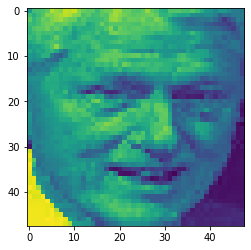

In [101]:
plt.imshow(DF.loc[0,'img'])

In [47]:
files[0:5]

['Campaign/1964-10-09_lyndon_b._johnson_speech_at_the_jung_hotel,_new_orleans.jpg',
 'Campaign/1972-11-06_richard_m._nixon_remarks_on_election_eve.jpg',
 'Campaign/1979-11-13_ronald_reagan_announcement_for_presidential_candidacy.jpg',
 'Campaign/1984-01-29_ronald_reagan_address_announcing_his_candidacy_for_reelection.jpg',
 'Campaign/1996-11-03_bill_clinton_remarks_to_the_congregation_of_st._paul_s_ame_church.jpg']

In [48]:
files[0]

'Campaign/1964-10-09_lyndon_b._johnson_speech_at_the_jung_hotel,_new_orleans.jpg'

In [58]:
DF[(DF.Date==files[0].split('/')[1].split('_')[0]) and  ]

In [59]:
DF[DF.Date=='1948-09-18']

,Date,President,Party,Context,Speech Title,Summary,Transcript,URL,img,embedding
573,1948-09-18,Harry S. Truman,Democratic,Campaign,"Whistlestop Tour in Chariton, Iowa",Misc,"I appreciate that introduction very much, and ...",https://millercenter.org/the-presidency/presid...,None,1
574,1948-09-18,Harry S. Truman,Democratic,Campaign,"Whistlestop Tour in Trenton, Missouri","During the 1948 presidential campaign, Truman ...",It certainly is a pleasure. This is the first ...,https://millercenter.org/the-presidency/presid...,None,1


In [233]:
DF.to_csv('/content/drive/MyDrive/MACS-37000/final/DF.csv')

In [234]:
DF.to_pickle('/content/drive/MyDrive/MACS-37000/final/DF.pkl')

In [235]:
DF1 = pd.read_pickle('/content/drive/MyDrive/MACS-37000/final/DF.pkl')

In [236]:
DF1

,Date,President,Party,Context,Speech Title,Summary,Transcript,URL,img,embedding
0,1789-04-30,George Washington,Unaffiliated,Inaugural,First Inaugural Address,Washington calls on Congress to avoid local an...,Fellow Citizens of the Senate and the House of...,https://millercenter.org/the-presidency/presid...,[],[]
1,1789-10-03,George Washington,Unaffiliated,Misc,Thanksgiving Proclamation,"At the request of Congress, Washington establi...",Whereas it is the duty of all Nations to ackno...,https://millercenter.org/the-presidency/presid...,[],[]
2,1790-01-08,George Washington,Unaffiliated,Congress,First Annual Message to Congress,"In a wide ranging speech, President Washington...",Fellow Citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...,[],[]
3,1790-12-08,George Washington,Unaffiliated,Congress,Second Annual Message to Congress,Washington focuses on commerce in his second a...,Fellow citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...,[],[]
4,1790-12-29,George Washington,Unaffiliated,Native,Talk to the Chiefs and Counselors of the Senec...,The President reassures the Seneca Nation that...,"I the President of the United States, by my ow...",https://millercenter.org/the-presidency/presid...,[],[]
...,...,...,...,...,...,...,...,...,...,...
987,2019-01-19,Donald Trump,Republican,Policy,Remarks about the US Southern Border,President Donald Trump speaks about what he se...,"Just a short time ago, I had the honor of pres...",https://millercenter.org/the-presidency/presid...,"[[0.29411765933036804, 0.3450980484485626, 0.3...","[-0.2954917550086975, -0.35841402411460876, 1...."
988,2019-02-05,Donald Trump,Republican,SOTU,State of the Union Address,"In his second State of the Union Address, Pres...","Madam Speaker, Mr. Vice President, Members of ...",https://millercenter.org/the-presidency/presid...,[],[]
989,2019-02-15,Donald Trump,Republican,Policy,Speech Declaring a National Emergency,President Donald Trump declares a national eme...,"Thank you very much, everybody. Before we begi...",https://millercenter.org/the-presidency/presid...,"[[0.5568627715110779, 0.46274513006210327, 0.5...","[-0.2954917550086975, 0.15529683232307434, 0.1..."
990,2019-09-24,Donald Trump,Republican,UN,Remarks at the United Nations General Assembly,President Donald Trump speaks to the 74th sess...,"Thank you very much. Mr. President, Mr. Secret...",https://millercenter.org/the-presidency/presid...,"[[0.729411780834198, 0.615686297416687, 0.6392...","[-0.2954917550086975, 0.0413987934589386, 1.07..."
